In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
import matplotlib.patches as mpatches

In [2]:
#Create Varibles for CSV files
athlete_data_to_load = 'raw data files/Olympic data/athlete_events.csv'
summer_data_to_load = 'raw data files/Olympic data/summer.csv'
winter_data_to_load = 'raw data files/Olympic data/winter.csv'

population_data_to_load = 'raw data files/Clean Data/2018_populations.csv'
summer_edited_load = 'raw data files/Clean Data/summer_edited.csv'
winter_edited_load = 'raw data files/Clean Data/winter_edited.csv'
athlete_data_to_load = 'raw data files/Olympic data/athlete_events.csv'

In [3]:
#Read in CSV files
athlete_data = pd.read_csv(athlete_data_to_load)
summer_data = pd.read_csv(summer_data_to_load)
winter_data = pd.read_csv(summer_data_to_load)

population_data = pd.read_csv(population_data_to_load)
summer_edited = pd.read_csv(summer_edited_load)
winter_edited = pd.read_csv(winter_edited_load)
athlete_data = pd.read_csv(athlete_data_to_load)

In [4]:
#Clean and organize the data
athlete_data_grouped = athlete_data.groupby('Team')
athlete_data_grouped.count().sort_values(by = 'Name', ascending = False).head(5)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
United States,17847,17847,17847,17610,14295,13791,17847,17847,17847,17847,17847,17847,17847,5219
France,11988,11988,11988,10877,8096,7853,11988,11988,11988,11988,11988,11988,11988,1550
Great Britain,11404,11404,11404,10731,7667,7574,11404,11404,11404,11404,11404,11404,11404,1673
Italy,10260,10260,10260,9922,7772,7462,10260,10260,10260,10260,10260,10260,10260,1527
Germany,9326,9326,9326,9180,7092,7032,9326,9326,9326,9326,9326,9326,9326,1984


In [5]:
athlete_data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [35]:
winter_edited = winter_edited.rename(columns= {"Grand Total": "Weighted Total"})
population_data = population_data.rename(columns= {"Country (code)": "Country Code"})
population_data["Population (2018)"] = population_data["Population (2018)"].div(1000000)

NameError: name 'winter_edited' is not defined

## How did major wars affect the country's performance and attendence in the Olympic games?

United States

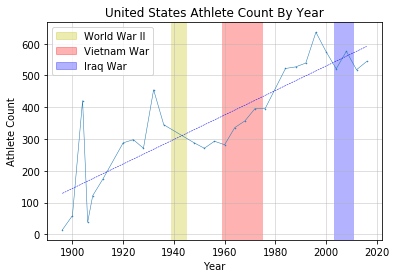

In [7]:
usa_data = athlete_data.loc[athlete_data['Team']=='United States']
usa_summer_data = usa_data.loc[usa_data['Season']=='Summer'].groupby(['Year'])['ID'].nunique()
usa_summer_data_df = pd.DataFrame(usa_summer_data).rename(columns = {'ID':'Athlete Count'})
usa_winter_data = usa_data.loc[usa_data['Season']=='Winter'].groupby(['Year'])['ID'].nunique()
usa_winter_data_df = pd.DataFrame(usa_winter_data).rename(columns = {'ID':'Athlete Count'})

(slope, intercept, _, _, _) = linregress(usa_summer_data_df.index,  usa_summer_data_df['Athlete Count'])
fit = slope * usa_summer_data_df.index + intercept

plt.plot(usa_summer_data_df.index, usa_summer_data_df['Athlete Count'], marker = 'o',markersize = 0.5, linewidth = 0.5)
plt.plot(usa_summer_data_df.index, fit, 'b--', linewidth = 0.5)

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'y')
vietnam = plt.axvspan(1959,1975,0,1, alpha = 0.3, facecolor = 'r')
iraq = plt.axvspan(2003, 2011, 0, 1, alpha = 0.3, facecolor = 'b', label = 'Iraq War')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War II')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'Vietnam War')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Iraq War')

plt.legend(handles=[yellow_patch, red_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.title('United States Athlete Count By Year')

plt.show()

Russia (Soviet Union)

Text(0.5, 1.0, 'Russian Athlete Count By Year')

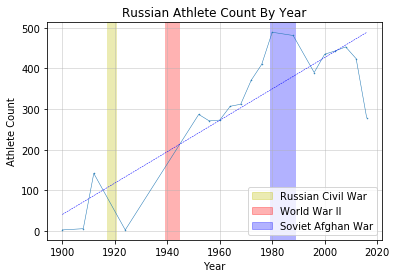

In [36]:
soviet_data = athlete_data.loc[athlete_data['Team'].isin(['Russia','Soviet Union'])]
soviet_summer_data = soviet_data.loc[soviet_data['Season']=='Summer'].groupby(['Year'])['ID'].nunique()
soviet_summer_data_df = pd.DataFrame(soviet_summer_data).rename(columns = {'ID':'Athlete Count'})

(slope, intercept, _, _, _) = linregress(soviet_summer_data_df.index,  soviet_summer_data_df['Athlete Count'])
fit = slope * soviet_summer_data_df.index + intercept

plt.plot(soviet_summer_data_df.index, soviet_summer_data_df['Athlete Count'], marker = 'o',linewidth = 0.5, markersize = 0.5,)
plt.plot(soviet_summer_data_df.index, fit, 'b--', linewidth = 0.5)

grid = plt.grid(which = 'major', axis = 'both', alpha = 0.5)
wwI = plt.axvspan(1917,1921,0,1, alpha = 0.3, facecolor = 'y')
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'r')
soviet_afghan = plt.axvspan(1979, 1989, 0, 1, alpha = 0.3, facecolor = 'b')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='Russian Civil War')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'World War II')
blue_patch = mpatches.Patch(color = 'b', alpha = 0.3, label = 'Soviet Afghan War')

plt.legend(handles=[yellow_patch, red_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.title('Russian Athlete Count By Year')

Germany

Text(0.5, 1.0, 'Germany Athlete Count By Year')

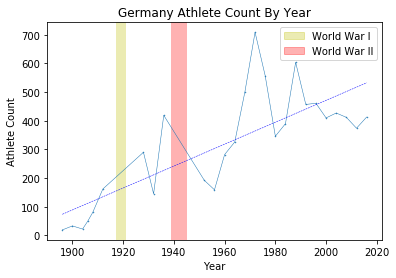

In [37]:
germany_data = athlete_data.loc[athlete_data['Team'].isin(['Germany','East Germany', 'West Germany'])]
germany_summer_data = germany_data.loc[germany_data['Season']=='Summer'].groupby(['Year'])['ID'].nunique()
germany_summer_data_df = pd.DataFrame(germany_summer_data).rename(columns = {'ID':'Athlete Count'})

(slope, intercept, _, _, _) = linregress(germany_summer_data_df.index,  germany_summer_data_df['Athlete Count'])
fit = slope * germany_summer_data_df.index + intercept

plt.plot(germany_summer_data_df.index, germany_summer_data_df['Athlete Count'], marker = 'o',linewidth = 0.5, markersize = 0.5,)
plt.plot(germany_summer_data_df.index, fit, 'b--', linewidth = 0.5)

wwI = plt.axvspan(1917,1921,0,1, alpha = 0.3, facecolor = 'y')
wwII = plt.axvspan(1939,1945,0,1, alpha = 0.3, facecolor = 'r')

yellow_patch = mpatches.Patch(color='y', alpha = 0.3, label='World War I')
red_patch = mpatches.Patch(color = 'r', alpha = 0.3, label = 'World War II')

plt.legend(handles=[yellow_patch, red_patch], loc = 'best')
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.title('Germany Athlete Count By Year')

Analysis & Conclusion: 

 The conclusions we found were mostly in line with our hypothesis but not necessarily conclusive. When we review each country, we see that the US had a drop off following WWII and participation remained low throughout the Vietnam war. After the war ended participation increased again with maybe a slight dip during and after the Iraq war.

 Russia’s population was decimated by the Russian Revolution and as a result, there were only 3 Russian participants in 1924. Russia did not participate in the Olympic games again until 1948 where participation remained increasingly high until the soviet afghan war and ever since it has been on a decline in both medal count and participation. 

 Germany’s data is more scattered, but participation peaked in 1936 prior to WWII and then dropped by approximately 230 people in 1948. 

 For France and Britain, it is difficult to derive any hard conclusions, but participation dropped for an extended period of time following WWII. Interestingly for both, despite steady rise in participation, medal count has been relatively stagnant.
 
 Finally, another accidental finding by tracking medal count throughout the Olympics is correlation between hosting the Olympics and medal count. It isn’t shown in the graphs, however, each dramatic spike in both attendance and medal count is almost always associated with being the host country. This isn’t necessarily surprising, but noteworthy, nonetheless. 

## Does a Country's population have an affect on their Olympic medal count?

In [10]:
#Build Population Dataframes
winter_edited = winter_edited.rename(columns= {"Grand Total": "Weighted Total"})
population_data = population_data.rename(columns= {"Country (code)": "Country Code"})
population_data["Population (2018)"] = population_data["Population (2018)"].div(1000000)

NameError: name 'winter_edited' is not defined

In [11]:
#Plot of combined medals and population 

(slope, intercept, r_value, _, _) = linregress(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"])
fit = slope *  medals_population_merged["Combined Total"] + intercept

plt.title("Population vs Weighted Medals")
plt.xlabel("Weighted Combined Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.plot(medals_population_merged["Combined Total"], fit, 'b--', linewidth = 1)
plt.scatter(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"], color = "red")
plt.show()

NameError: name 'medals_population_merged' is not defined

In [12]:
medals_population_merged = medals_population_merged[medals_population_merged["Country Code"] != "USA"]
medals_population_merged = medals_population_merged[medals_population_merged["Country Code"] != "CHN"]

plt.scatter(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"], color = "red")

(slope, intercept, r_value, _, _) = linregress(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"])
fit = slope *  medals_population_merged["Combined Total"] + intercept

plt.plot(medals_population_merged["Combined Total"], fit, 'b--', linewidth = 1)

plt.title("Population vs Weighted Medals (without USA and China)")
plt.xlabel("Weighted Combined Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()
plt.show()

r_squared_total = r_value **2
print(f"R Squared: {r_squared_total_nonUS}")

NameError: name 'medals_population_merged' is not defined

In [13]:
medals_population_summer = pd.merge(summer_edited, population_data, on="Country Code")
medals_population_summer.head()

NameError: name 'summer_edited' is not defined

In [14]:
medals_population_summer['Weighted Total'] = medals_population_summer['Weighted Total'].astype(float)

x = medals_population_summer["Weighted Total"].values
y = medals_population_summer["Population (2018)"].values

# Plot of Summer Medals vs Population 

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])

plt.scatter(x[mask], y[mask], color = "red")

fit = slope *  x[mask] + intercept

plt.plot(x[mask], fit, 'b--', linewidth = 1)

plt.title("Population vs Weighted Medals (Summer)")
plt.xlabel("Weighted Summer Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()
plt.show()

NameError: name 'medals_population_summer' is not defined

In [ ]:
medals_population_summer = medals_population_summer[medals_population_summer["Country Code"] != "USA"]
medals_population_summer = medals_population_summer[medals_population_summer["Country Code"] != "CHN"]
medals_population_summer = medals_population_summer[medals_population_summer["Country Code"] != "IND"]

x = medals_population_summer["Weighted Total"].values
y = medals_population_summer["Population (2018)"].values

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])

plt.scatter(x[mask], y[mask])

fit = slope *  x[mask] + intercept

plt.plot(x[mask], fit, 'b--', linewidth = 1)

plt.scatter(medals_population_summer["Weighted Total"], medals_population_summer["Population (2018)"], color = "red")
plt.title("Population vs Weighted Medals (Summer without USA, CHN, IND)")
plt.xlabel("Weighted Summer Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()
plt.show()

r_squared_summer = r_value ** 2 

print(f"R Squared: {r_squared_summer}")

Analysis & Conclusion: 


# How has the composition of male and female competitors over the years for the USA, China, and Russia?

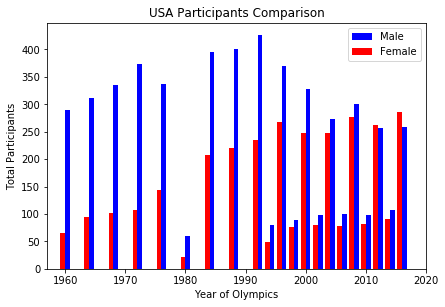

In [15]:
#Male vs Female for US: 

usa_data = athlete_data.loc[athlete_data['Team']=='United States']

usa_male_data = usa_data.loc[usa_data['Sex']=='M'].groupby(['Year'])['ID'].nunique()
usa_male_data_df = pd.DataFrame(usa_male_data).rename(columns = {'ID':'Male'})

usa_female_data = usa_data.loc[usa_data['Sex']=='F'].groupby(['Year'])['ID'].nunique()
usa_female_data_df = pd.DataFrame(usa_female_data).rename(columns = {'ID':'Female'})

usa_m_f = pd.merge(usa_male_data_df, usa_female_data_df, on="Year")

bar_width = 0.4
plt.bar( usa_m_f.index + bar_width, usa_m_f["Male"], label= "Male", color="blue")
plt.bar( usa_m_f.index - bar_width, usa_m_f["Female"], label= "Female", color="red")


plt.legend()
plt.tight_layout()
plt.title("USA Participants Comparison")
plt.xlabel("Year of Olympics")
plt.ylabel("Total Participants")
#plt.xticks(usa_m_f.index)
plt.xlim([1957, 2020])
plt.show()

China Male v. Female

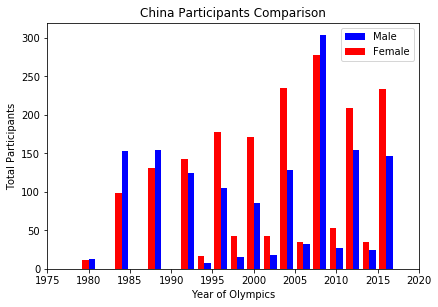

In [16]:
#Male vs Female for China

china_data = athlete_data.loc[athlete_data['Team']=='China']

china_male_data = china_data.loc[china_data['Sex']=='M'].groupby(['Year'])['ID'].nunique()
china_male_data_df = pd.DataFrame(china_male_data).rename(columns = {'ID':'Male'})

china_female_data = china_data.loc[china_data['Sex']=='F'].groupby(['Year'])['ID'].nunique()
china_female_data_df = pd.DataFrame(china_female_data).rename(columns = {'ID':'Female'})

china_m_f = pd.merge(china_male_data_df, china_female_data_df, on="Year")

bar_width = 0.4
plt.bar( china_m_f.index + bar_width, china_m_f["Male"], label= "Male", color="blue")
plt.bar( china_m_f.index - bar_width, china_m_f["Female"], label= "Female", color="red")
plt.xlim([1975, 2020])
plt.legend()
plt.tight_layout()
plt.title("China Participants Comparison")
plt.xlabel("Year of Olympics")
plt.ylabel("Total Participants")
plt.show()

Russia Male v. Female

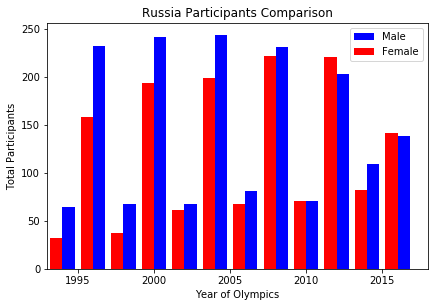

In [17]:
rus_data = athlete_data.loc[athlete_data['Team']=='Russia']

rus_male_data = rus_data.loc[rus_data['Sex']=='M'].groupby(['Year'])['ID'].nunique()
rus_male_data_df = pd.DataFrame(rus_male_data).rename(columns = {'ID':'Male'})

rus_female_data = rus_data.loc[rus_data['Sex']=='F'].groupby(['Year'])['ID'].nunique()
rus_female_data_df = pd.DataFrame(rus_female_data).rename(columns = {'ID':'Female'})

rus_m_f = pd.merge(rus_male_data_df, rus_female_data_df, on="Year")

bar_width = 0.4
plt.bar( rus_m_f.index + bar_width, rus_m_f["Male"], label= "Male", color="blue")
plt.bar( rus_m_f.index - bar_width, rus_m_f["Female"], label= "Female", color="red")
plt.xlim([1993, 2018])
plt.legend()
plt.tight_layout()
plt.title("Russia Participants Comparison")
plt.xlabel("Year of Olympics")
plt.ylabel("Total Participants")
plt.show()

Analysis & Conclusion: 

